In [1]:
!pip install pandas numpy matplotlib  scikit-learn plotly seaborn statsmodels scipy

In [2]:
# 데이터 분석 및 시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시계열 분석 및 모델링 라이브러리
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import os


In [3]:
# 데이터 로드 및 전처리
path = './input/'

# 'input' 디렉토리의 모든 파일 목록 가져오기
files = os.listdir(path)

# 데이터프레임을 저장할 빈 리스트 초기화
df_list = []

# 모든 파일을 반복하며 데이터 로드
for file in files:
    # 현재 파일의 CSV 읽기
    df = pd.read_csv(path + file, encoding='CP949')

    # 필요한 열 선택 및 열 이름 변경
    df = df[['일시', '평균기온(°C)']].rename(columns={'일시': 'date', '평균기온(°C)': 'temperature'})

    # 'date' 열을 datetime 형식으로 변환하고 연, 월, 일을 추출
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # 최종 열 선택 및 데이터프레임 리스트에 추가
    df = df[['date', 'year', 'month', 'day', 'temperature']]
    df_list.append(df)

# 리스트의 모든 데이터프레임을 하나로 결합
df = pd.concat(df_list, ignore_index=True)

# 데이터 확인
df.head()

,date,year,month,day,temperature
0,1997-01-01,1997,1,1,-1.2
1,1997-01-02,1997,1,2,-8.4
2,1997-01-03,1997,1,3,-6.8
3,1997-01-04,1997,1,4,-4.6
4,1997-01-05,1997,1,5,-2.2


In [4]:
# 시계열 데이터 설정
df.set_index('date', inplace=True)
df = df['temperature']


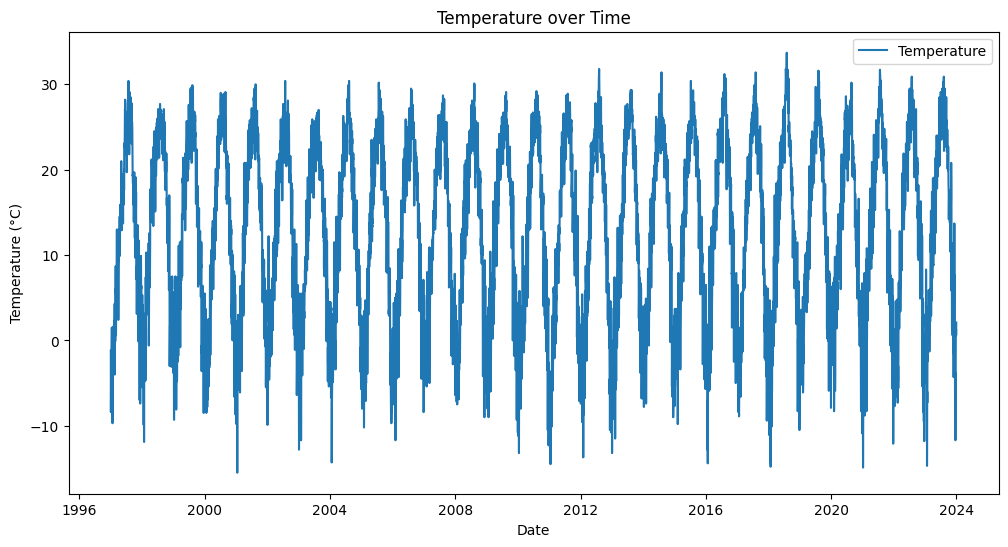

In [5]:
# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(df, label='Temperature')
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [6]:
# 데이터 분할 (학습용: 2023년 이전, 테스트용: 2023년)
train = df[df.index.year < 2023]
test = df[df.index.year == 2023]


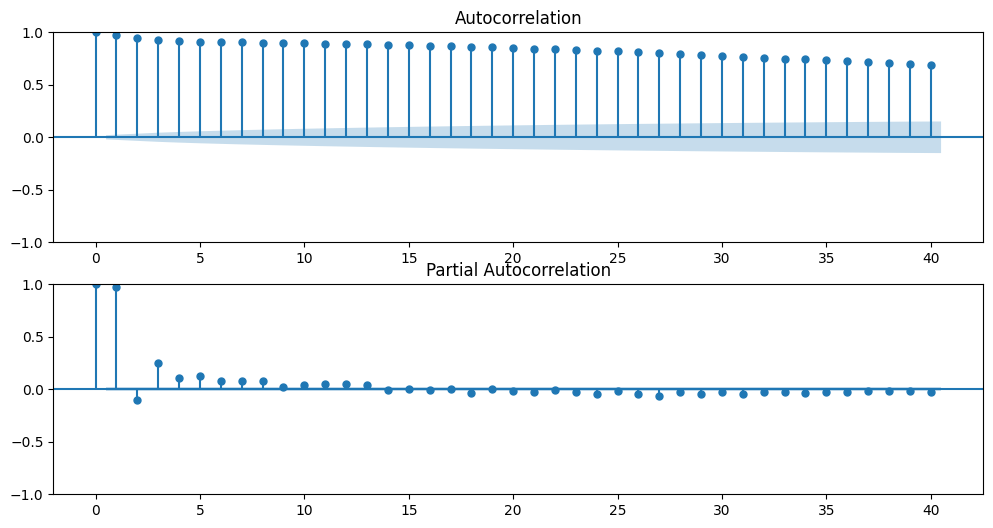

In [7]:
# ACF 및 PACF 플롯
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train, ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(train, ax=plt.gca(), lags=40)
plt.show()


In [8]:
# 파라미터 튜닝 함수 정의
def evaluate_arima_model(train, test, arima_order):
    # 모델 학습 및 예측
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    forecast = pd.Series(forecast, index=test.index)

    # 성능 평가
    mse = mean_squared_error(test, forecast)
    correlation, p_value = pearsonr(test, forecast)
    return mse, correlation, p_value


p_list = []
d_list = []
q_list = []
mse_list = []
correlation_list = []
p_value_list = []


# 파라미터 튜닝
for p in range(0, 6):
    for d in range(0, 3):
        for q in range(0, 3):
            try:
                mse, correlation, p_value = evaluate_arima_model(train, test, (p, d, q))
                p_list.append(p)
                d_list.append(d)
                q_list.append(q)
                mse_list.append(mse)
                correlation_list.append(correlation)
                p_value_list.append(p_value)
                print(f'ARIMA{(p, d, q)} MSE={mse}, Correlation={correlation}, p-value={p_value}')
            except:
                continue
df_arima = pd.DataFrame({'p': p_list, 'd': d_list, 'q': q_list, 'mse': mse_list, 'correlation': correlation_list, 'p_value': p_value_list})
df_arima

C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\AppData\Local\Temp\ipykernel_6796\3081840763.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(test, forecast)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_

ARIMA(0, 0, 0) MSE=112.62954315528964, Correlation=nan, p-value=nan
ARIMA(0, 0, 1) MSE=112.36110428778638, Correlation=0.0710367230694282, p-value=0.17566910866736454


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) MSE=111.92720632130698, Correlation=0.09555023382305351, p-value=0.06824327712677775
ARIMA(0, 1, 0) MSE=345.8356712328767, Correlation=nan, p-value=nan


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\AppData\Local\Temp\ipykernel_6796\3081840763.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(test, forecast)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_

ARIMA(0, 1, 1) MSE=343.76064116325625, Correlation=nan, p-value=nan
ARIMA(0, 1, 2) MSE=370.7554384139414, Correlation=-0.07103672306942795, p-value=0.17566910866736493
ARIMA(0, 2, 0) MSE=12770.957863417263, Correlation=0.19909074596709322, p-value=0.00012867750347803826


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmo

ARIMA(0, 2, 1) MSE=351.67701785867695, Correlation=-0.19909074596708817, p-value=0.00012867750347808873


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) MSE=351.25334365950516, Correlation=-0.19909074596708812, p-value=0.00012867750347808873


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) MSE=92.25172751825072, Correlation=0.561409698932075, p-value=1.0638607395193318e-31


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) MSE=94.55219505174928, Correlation=0.5243991328139062, p-value=3.555450732297329e-27


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) MSE=109.58709686127133, Correlation=0.5089531909503322, p-value=1.906018281237526e-25
ARIMA(1, 1, 0) MSE=344.191383031973, Correlation=0.07907924038978582, p-value=0.13155785089863675


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmo

ARIMA(1, 1, 1) MSE=344.55096856697156, Correlation=-0.03857647915323553, p-value=0.4624928809298499


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) MSE=404.70515605368354, Correlation=-0.12911941090334902, p-value=0.013560340299685027
ARIMA(1, 2, 0) MSE=19111.555792155887, Correlation=0.1990905223936919, p-value=0.0001286797975184537


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmo

ARIMA(1, 2, 1) MSE=350.92207638609034, Correlation=-0.198971512427241, p-value=0.00012990639743330445


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 2, 2) MSE=345.36979736992475, Correlation=-0.20064789013756623, p-value=0.00011359833209366137


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) MSE=94.02895241793782, Correlation=0.5399250847864429, p-value=5.260992687792144e-29


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hoseong\pycharmProjec

ARIMA(2, 0, 1) MSE=93.49170918281277, Correlation=0.5410145480063613, p-value=3.882186288741563e-29


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 2) MSE=177.33688985443393, Correlation=0.3638143209221982, p-value=7.275822164049704e-13


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) MSE=356.16624087882167, Correlation=0.009054785058296756, p-value=0.8631218238494591


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1) MSE=403.8363262871288, Correlation=-0.0722949120883394, p-value=0.16812339056839062


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) MSE=405.1065734518444, Correlation=-0.10560688970493654, p-value=0.04376465570413125


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 0) MSE=16747.76581012763, Correlation=0.19909225817110532, p-value=0.00012866198807330028


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 1) MSE=356.0010291847678, Correlation=0.08013971151835829, p-value=0.12644443825443125


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 2) MSE=6864.751131059033, Correlation=-0.19962490105059905, p-value=0.00012330490033569125


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 0) MSE=92.80384842668786, Correlation=0.5719826039431511, p-value=4.2403628239622975e-33


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) MSE=171.94359911524026, Correlation=0.3724655600396712, p-value=1.8673934726520228e-13


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 0, 2) MSE=176.19235006761912, Correlation=0.36632402027426963, p-value=4.924460645494155e-13


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 0) MSE=360.8366464729881, Correlation=0.008604567903309815, p-value=0.8698656014756738


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 1) MSE=404.84284275897613, Correlation=-0.10460775568718367, p-value=0.045808272949077


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 2) MSE=405.0142419092742, Correlation=-0.09626528639643267, p-value=0.06619425165022018


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 2, 0) MSE=9243.760751664464, Correlation=0.19909807153777873, p-value=0.00012860235854223235


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 2, 1) MSE=360.8175065148415, Correlation=0.012081393566950848, p-value=0.8180673810397161


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(3, 2, 2) MSE=358.44184228311735, Correlation=-0.1916854899429049, p-value=0.0002297813644975087


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 0, 0) MSE=96.15675220381567, Correlation=0.5595399598444988, p-value=1.8585840449025987e-31


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 0, 1) MSE=175.95127909679672, Correlation=0.36725831147612636, p-value=4.254722200796286e-13


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hoseong\pycharmProjec

ARIMA(4, 0, 2) MSE=164.62955506337326, Correlation=0.39499353686379635, p-value=4.448142328004158e-15


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 1, 0) MSE=364.03657482307466, Correlation=-0.010775104210795729, p-value=0.837448740276984


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 1, 1) MSE=405.5530726054191, Correlation=-0.07460627832586401, p-value=0.15489712456787078


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\s

ARIMA(4, 1, 2) MSE=1435.8040958436407, Correlation=-0.5547599093500186, p-value=7.615522579686036e-31
ARIMA(4, 2, 0) MSE=10068.255703634602, Correlation=0.19909388139727907, p-value=0.00012864533552100525


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 2, 1) MSE=363.82569041841924, Correlation=0.019597810195771267, p-value=0.7090239988219416


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 2) MSE=502.81958637205486, Correlation=-0.20138840556881957, p-value=0.00010702490893323331


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 0, 0) MSE=104.10185707305648, Correlation=0.5276598929824191, p-value=1.4941522200648981e-27


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 0, 1) MSE=175.63411617196272, Correlation=0.36808239246998814, p-value=3.7385372889581086e-13


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 2) MSE=393.1580755455872, Correlation=0.26945588861268777, p-value=1.7201530064407284e-07


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 1, 0) MSE=368.5928817783341, Correlation=-0.006618089406955037, p-value=0.8997270893947553


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 1, 1) MSE=405.79986071826056, Correlation=-0.06983507311968218, p-value=0.18310788210136514


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 1, 2) MSE=405.56356660635146, Correlation=-0.07442069064797373, p-value=0.15592914522626472


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 2, 0) MSE=12033.236279767496, Correlation=0.19908696654979052, p-value=0.00012871628845739484


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(5, 2, 1) MSE=368.19997540881735, Correlation=0.04910392780692608, p-value=0.34954314544914866


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 2) MSE=370.7216231977453, Correlation=-0.19530871057809052, p-value=0.00017348620623142916


,p,d,q,mse,correlation,p_value
0,0,0,0,112.629543,NaN,NaN
1,0,0,1,112.361104,0.071037,1.756691e-01
2,0,0,2,111.927206,0.095550,6.824328e-02
3,0,1,0,345.835671,NaN,NaN
4,0,1,1,343.760641,NaN,NaN
5,0,1,2,370.755438,-0.071037,1.756691e-01
6,0,2,0,12770.957863,0.199091,1.286775e-04
7,0,2,1,351.677018,-0.199091,1.286775e-04
8,0,2,2,351.253344,-0.199091,1.286775e-04
9,1,0,0,92.251728,0.561410,1.063861e-31


In [9]:
# 최적 모델로 예측 수행
model = ARIMA(train, order=(3,0,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)


C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hoseong\pycharmProjects\earthScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


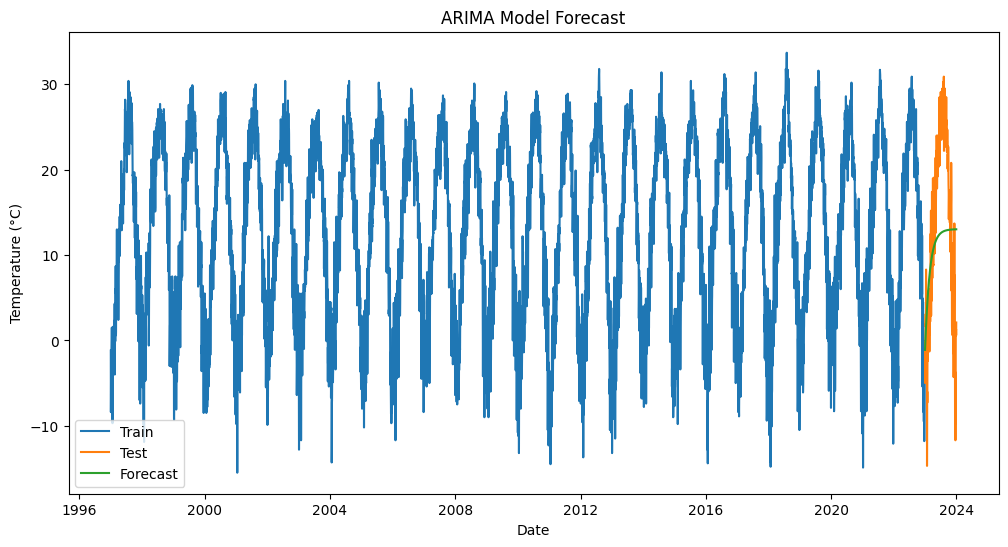

In [10]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [11]:
# 최적 모델의 성능 평가
mse = mean_squared_error(test, forecast)
correlation, p_value = pearsonr(test, forecast)

print(f'Best Model Mean Squared Error: {mse}')
print(f'Best Model Pearson Correlation: {correlation}')
print(f'Best Model p-value: {p_value}')


Best Model Mean Squared Error: 92.80384842668786
Best Model Pearson Correlation: 0.5719826039431511
Best Model p-value: 4.2403628239622975e-33
